# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [5]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path_1 = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path_1)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [6]:
# Getting the data from the top 10 expensive neighbourhoods
to_data = pd.read_csv(file_path, index_col='neighbourhood')
top10_expen_neighb = to_data.groupby(by=['neighbourhood']).mean()
top10_expen_neighb.sort_values(by='average_house_value', ascending=False, inplace=True)
top10_expen_neighb.reset_index(inplace=True)
top10_expen_neighb = top10_expen_neighb.head(10)
top10_expen_neighb.drop(columns='year', inplace=True)
top10_expen_neighb.head()



neighbourhood  single_detached_house  \
0  Bridle Path-Sunnybrook-York Mills                2260.00   
1                  Forest Hill South                1742.50   
2                Lawrence Park South                3472.50   
3                Rosedale-Moore Park                2498.75   
4               St.Andrew-Windfields                3225.00   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                       331.25              0.00                36.25   
1                      2031.25              1.25                61.25   
2                       773.75              0.00               126.25   
3                      4641.25              0.00               486.25   
4                      1670.00              0.00               185.00   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0      90.00    25.0                        40.00         0.00   
1      45.00    75.0                      1027.50         3.75   
2      38.75   225.0                       966.25        16.25   
3     245.00   327.5                      1618.75         2.50   
4     552.50    97.5                       586.25         5.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0           1526485.75              2360.75               2321.75  
1           1195992.50              1781.00               1313.75  
2           1094027.75              1954.00               1372.75  
3           1093640.00              1909.75               1537.25  
4            999107.00              1880.25               1384.50

In [7]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_monthly_shelter_costs=to_data[["shelter_costs_owned","shelter_costs_rented","year"]].groupby(by="year",level=None).mean()
avg_monthly_shelter_costs

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [8]:
#Dwelling House value DataFrame 
dwelling_types_per_year = to_data.groupby(by='year', level=None).sum()
df=pd.DataFrame(dwelling_types_per_year)
df.to_csv('Data/dwelling_types_per_year.csv', header=False)
columns=['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']
dwelling_types=dwelling_types_per_year[columns]
dwelling_types.head()

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [9]:
#Dataframe for Average House Sales
to_data = pd.read_csv(file_path, index_col="year")
tor_data_new = to_data.groupby([to_data.index, 'neighbourhood']).mean()
tor_sales = tor_data_new['average_house_value']
tor_sales_df = pd.DataFrame(tor_sales).reset_index()
tor_sales_df.head(10)

year                 neighbourhood  average_house_value
0  2001               Agincourt North               200388
1  2001  Agincourt South-Malvern West               203047
2  2001                     Alderwood               259998
3  2001                         Annex               453850
4  2001             Banbury-Don Mills               371864
5  2001                Bathurst Manor               304749
6  2001           Bay Street Corridor               257404
7  2001               Bayview Village               327644
8  2001         Bayview Woods-Steeles               343535
9  2001          Bedford Park-Nortown               565304

In [10]:
#Average house value DataFrame 
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
avg_house_value=to_data[['average_house_value']].groupby(by='year',level=None).mean()
avg_house_value

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

### Panel Visualization Functions

In [11]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    
    each_neighbourhood = to_data.groupby(by='neighbourhood').mean()
    each_neighbourhood.reset_index(inplace=True)
    each_neighbourhood = pd.merge(df_neighbourhood_locations, each_neighbourhood, on='neighbourhood')    
    px.set_mapbox_access_token(map_box_api)
    map_scatter = px.scatter_mapbox(each_neighbourhood,
    lat='lat',
    lon='lon',
    size='average_house_value',
    color='shelter_costs_owned',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name='neighbourhood',
    title='Averange House Values in Toronto',
    )

    return map_scatter


In [12]:
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    fig=plt.figure()
    bar=data.plot.bar(color=color)
    bar.set_xlabel(xlabel)
    bar.set_ylabel(ylabel)
    bar.set_title(title)
    plt.show()
    plt.close(fig)

    return fig

In [13]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    
    fig=plt.figure()
    line=data.plot.line(color=color)
    line.set_xlabel(xlabel)
    line.set_ylabel(ylabel)
    line.set_title(title)
    plt.show()  
    plt.close(fig)
    
    return fig

In [14]:
def average_house_value():
    """Average house values per year."""
    

    avg_house_value=to_data[['average_house_value']].groupby(by='year',level=None).mean()
    create_line_chart(avg_house_value, 
    color = 'orange',
    xlabel="Year",
    ylabel="Avg House Value",
    title="Average House Value In Toronto")

    return plt

In [24]:
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    tor_sales_plot = tor_sales_df.hvplot.line(x='year',
                             y='average_house_value',
                             groupby="neighbourhood")
    
    return tor_sales_plot

In [16]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    list_dwellings = ['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']
    fig=to_data.hvplot.bar('year',
                           list_dwellings,groupby='neighbourhood',
                           rot=90,
                           stacked=False,
                           xlabel='Year',
                           ylabel='Dwelling Type Units',
                           width=700,
                           height=400)

    return fig 

In [17]:
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""
    
    barchart=px.bar(to_data,
        x='neighbourhood',width=900,
        y='average_house_value',height=1000,
        color='average_house_value',
        orientation='v',
        facet_row=to_data.index,
        facet_row_spacing=0.001,
        title='Average House Values in Toronto per Neighbourhood',
               )
    figure = barchart
    figure.update_xaxes(categoryorder='category ascending')
    
    return barchart

In [18]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""

    top10_expen_neighb_plot = top10_expen_neighb.hvplot.bar(x='neighbourhood',
                                y='average_house_value',
                                rot=90,
                                ylim=[0,1800000],
                                width=600,
                                height=500,
                                title='Top 10 Expensive Neighbourhoods')
    
    return top10_expen_neighb_plot

In [19]:
def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
    to_data = pd.read_csv(file_path, index_col="year")
    df_expensive_neighb_year=to_data[to_data['neighbourhood'].isin(top10_expen_neighb['neighbourhood'])]
    df_expensive_neighb_year.reset_index (inplace=True)  
    fig = px.sunburst(df_expensive_neighb_year,
                      path=["year", "neighbourhood"],
                      values='average_house_value',
                      width=750, height=750,
                      color_continuous_scale="RdBu",
                      color='shelter_costs_owned',
                      title="Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year"
                      )
    return fig

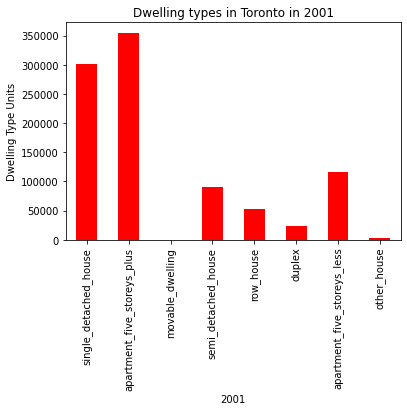

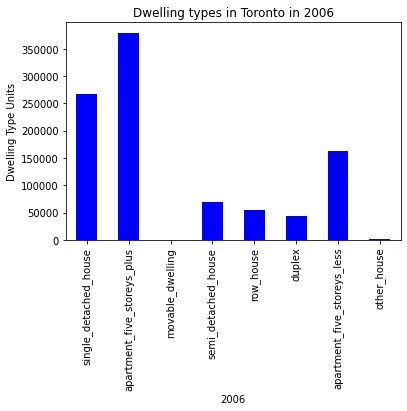

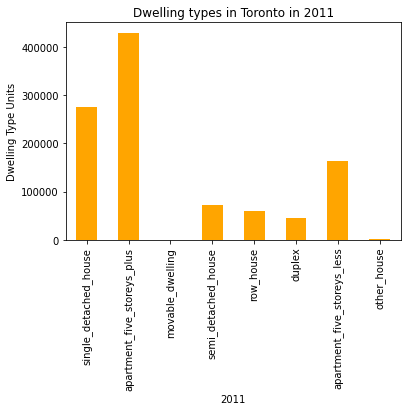

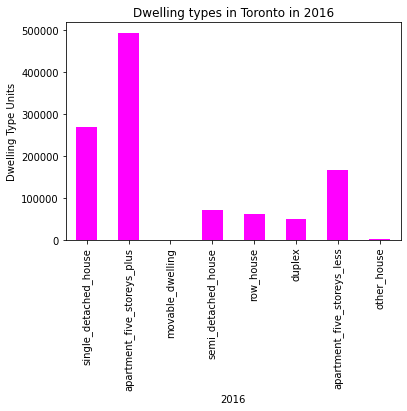

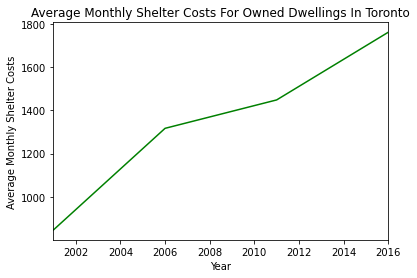

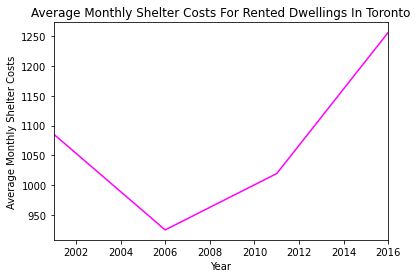

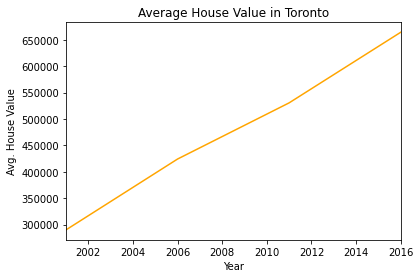

In [20]:
#Bar Chart functions (Dwelling types in Toronto from 2001-2016); Line Chart functions (shelter_costs_owned, shelter_costs_rented, Average_house_value)

# Bar chart for 2001
bar_chart_2001 = create_bar_chart(dwelling_types.loc[2001],
                                  'Dwelling types in Toronto in 2001',
                                  '2001',
                                  'Dwelling Type Units',
                                  'red')

# Bar chart for 2006
bar_chart_2006 = create_bar_chart(dwelling_types.loc[2006],
                                  'Dwelling types in Toronto in 2006',
                                  '2006',
                                  'Dwelling Type Units',
                                  'blue')

# Bar chart for 2011
bar_chart_2011 = create_bar_chart(dwelling_types.loc[2011],
                                  'Dwelling types in Toronto in 2011',
                                  '2011',
                                  'Dwelling Type Units',
                                  'orange')

# Bar chart for 2016
bar_chart_2016 = create_bar_chart(dwelling_types.loc[2016],
                                  'Dwelling types in Toronto in 2016',
                                  '2016',
                                  'Dwelling Type Units',
                                  'magenta')




# Line chart for owned dwellings
line_chart_owned = create_line_chart(avg_monthly_shelter_costs['shelter_costs_owned'],
                                     'Average Monthly Shelter Costs For Owned Dwellings In Toronto',
                                     'Year',
                                     'Average Monthly Shelter Costs',
                                     'green')

# Line chart for rented dwellings
line_chart_rented = create_line_chart(avg_monthly_shelter_costs['shelter_costs_rented'],
                                      'Average Monthly Shelter Costs For Rented Dwellings In Toronto',
                                      'Year',
                                      'Average Monthly Shelter Costs',
                                      'magenta')

# line chart average house value per year as a line chart
line_avg_house_val = create_line_chart(avg_house_value['average_house_value'],
                                       'Average House Value in Toronto',
                                       'Year',
                                       'Avg. House Value','orange')


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Column(height=800, sizing_mode='fixed', width=1000)
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Column
            [0] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
            [1] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive02587')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive02593')
                        [0] HoloViews(DynamicMap, name='interactive02593')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                            [1] VSpacer()
            [2] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive02637')
                        [0] HoloViews(DynamicMap, name='interactive02637')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                            [1] VSpacer()
        [3] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [4] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Bars, name='interactive02678')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive02771')
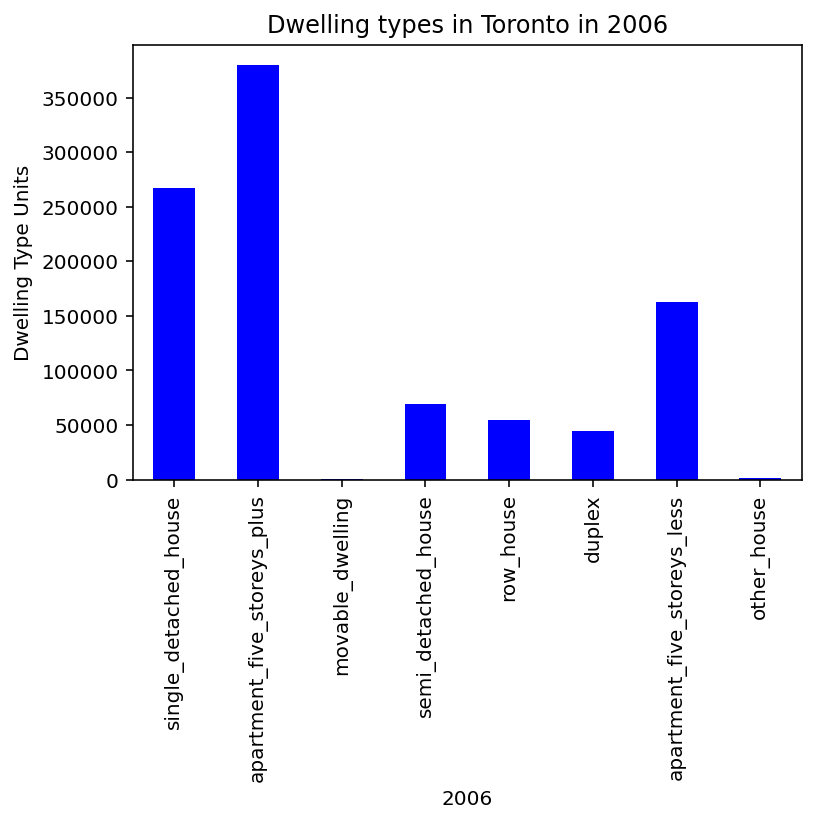
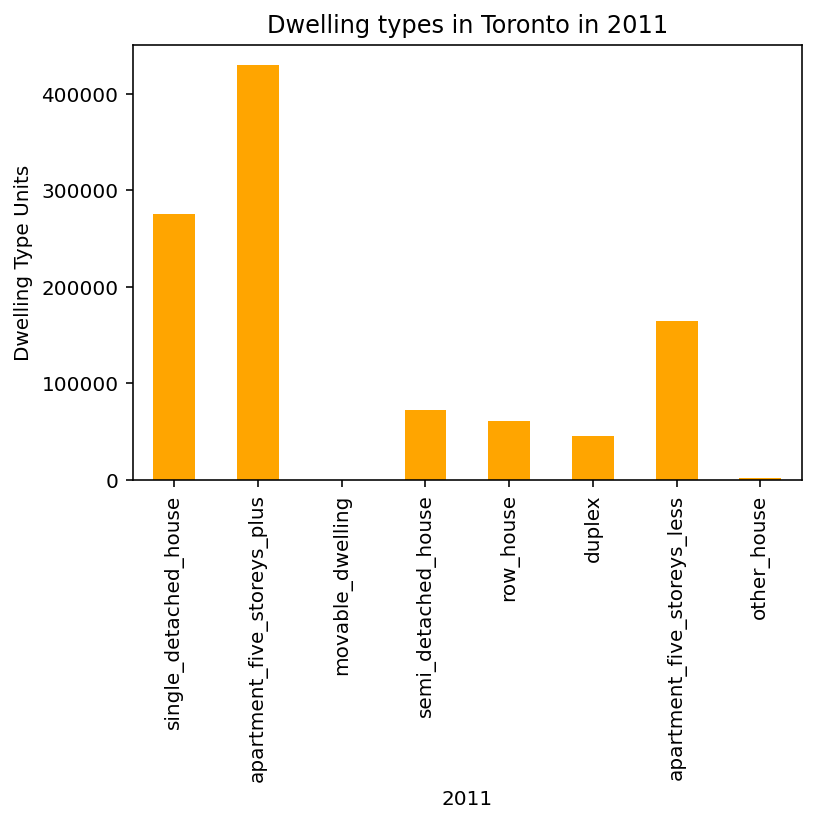
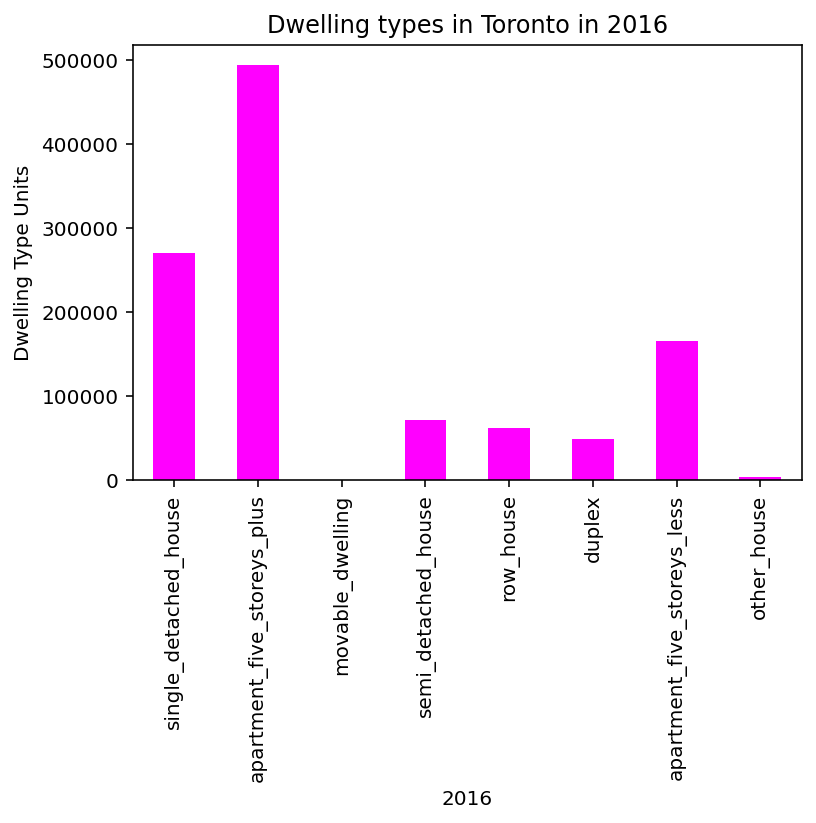
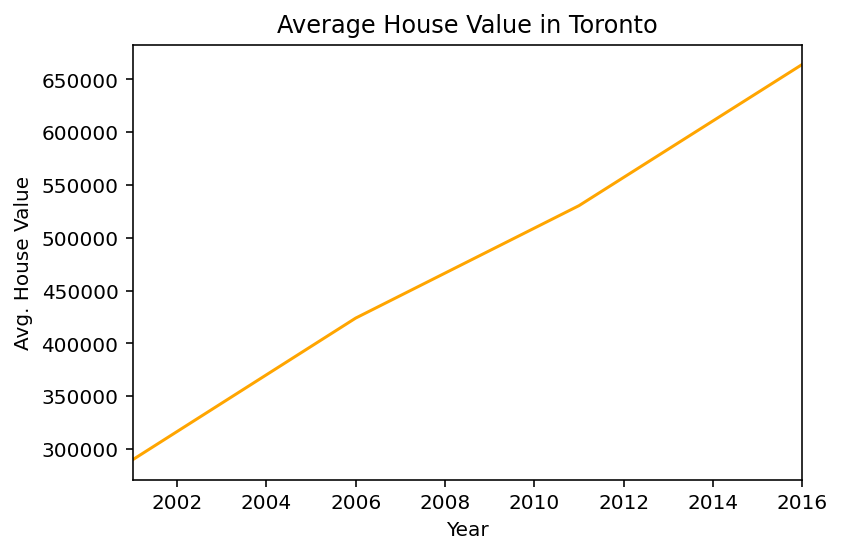
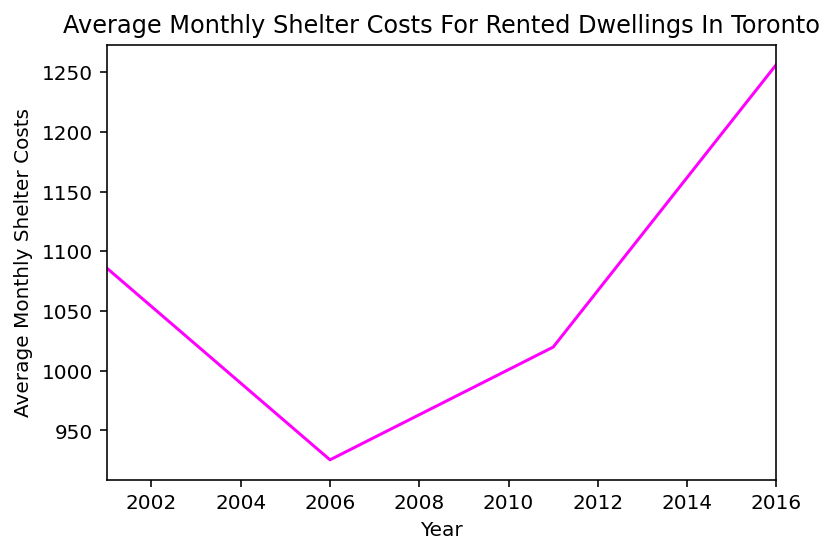
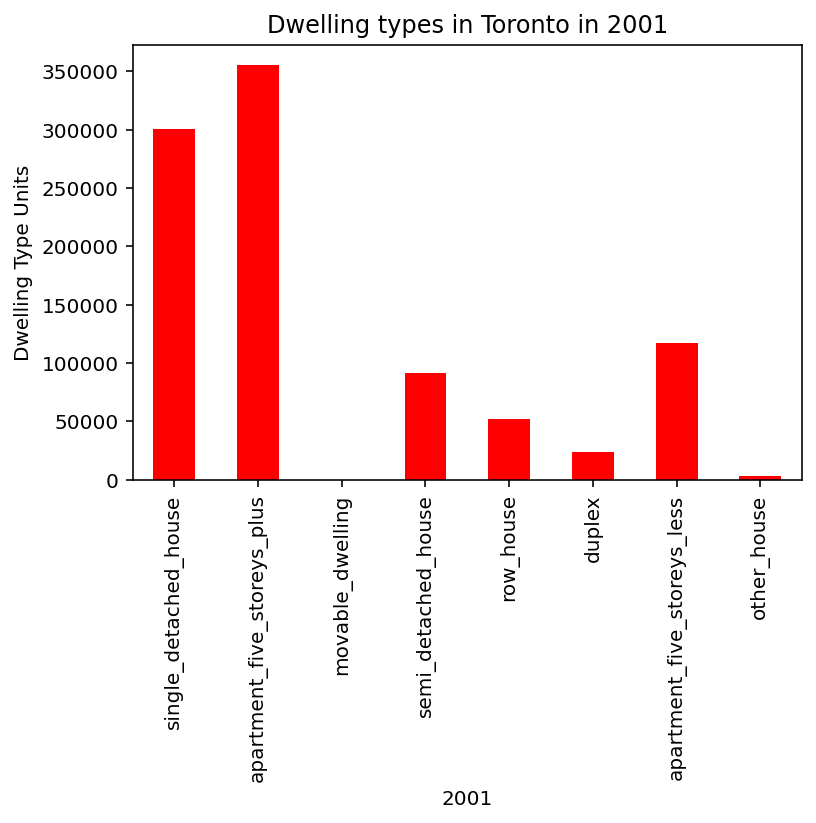
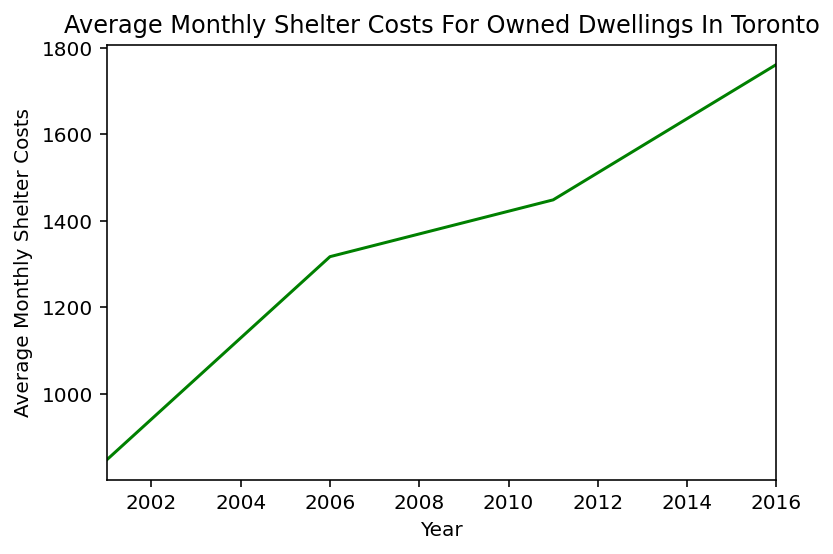

In [25]:
# Create a Title for the Dashboard
title = pn.pane.Markdown('Real Estate Analysis of Toronto from 2001 to 2016')

# Define a welcome text
Msg_Text= pn.pane.Markdown(' ## Welcome to one of the most sort after cities in Canada. Toronto Ontario is known for its diverse communities and increasing cost of living. This cost analysis is a breakdown by neighbourhood and dwelling types in the city.')


#Converting Bar charts functions (Dwelling types in Toronto from 2001-2016), Line charts functions (shelter_costs_owned, shelter_costs_rented, Average_house_value) to pn.pane
bar_chart_2001_pn = pn.pane.Matplotlib(bar_chart_2001, tight=True)
bar_chart_2006_pn = pn.pane.Matplotlib(bar_chart_2006, tight=True)
bar_chart_2011_pn = pn.pane.Matplotlib(bar_chart_2011, tight=True)
bar_chart_2016_pn = pn.pane.Matplotlib(bar_chart_2016, tight=True)

line_chart_owned_pn = pn.pane.Matplotlib(line_chart_owned, tight=True)
line_chart_rented_pn = pn.pane.Matplotlib(line_chart_rented, tight=True)
line_avg_house_val_pn = pn.pane.Matplotlib(line_avg_house_val, tight=True)


# Converting all charts for Dashboard upload.
neighbourhood_map_pn = pn.pane.Plotly(neighbourhood_map())
neighbourhood_dwellings_analysis_pn = pn.Column(average_house_value_snapshot, number_dwelling_types, average_value_by_neighbourhood)
years2001_2006 = pn.Row(bar_chart_2001_pn, bar_chart_2006_pn)
years2011_2016 = pn.Row(bar_chart_2011_pn, bar_chart_2016_pn)
years2001_2016 = pn.Column (years2001_2006, years2011_2016)
Dwellings_value = pn.Column(line_chart_owned_pn, line_chart_rented_pn, line_avg_house_val_pn)
Welcome_Text = pn.Column(Msg_Text,neighbourhood_map_pn)
Most_expensive_neighbourhoods = pn.Column(top_most_expensive_neighbourhoods, sunburts_cost_analysis)



#Dashboard tabs layout 
tabs = pn.Tabs(("Welcome",Welcome_Text),
                ("Yearly Market Analysis", years2001_2016),
                ("Neighbourhood Analysis", neighbourhood_dwellings_analysis_pn),
                ("Shelter Costs vs House Value", Dwellings_value),
                ("Top Expensive Neighbourhoods",Most_expensive_neighbourhoods),
                )


# Create the main dashboard
dashboard = pn.Column(pn.Row(title),tabs, width =1000, height = 800)
dashboard

## Serve the Panel Dashboard

Column(height=800, sizing_mode='fixed', width=1000)
    [0] Row
        [0] Markdown(str)
    [1] Tabs(active=2)
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure, relayout_data={'autosize': True})
        [1] Column
            [0] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
            [1] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive02587', viewport={'xaxis.range': [-0.5, ...})
            [1] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive02593')
                        [0] HoloViews(DynamicMap, name='interactive02593')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                            [1] VSpacer()
            [2] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive02637')
                        [0] HoloViews(DynamicMap, name='interactive02637')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                            [1] VSpacer()
        [3] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [4] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Bars, name='interactive02678')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive02771')
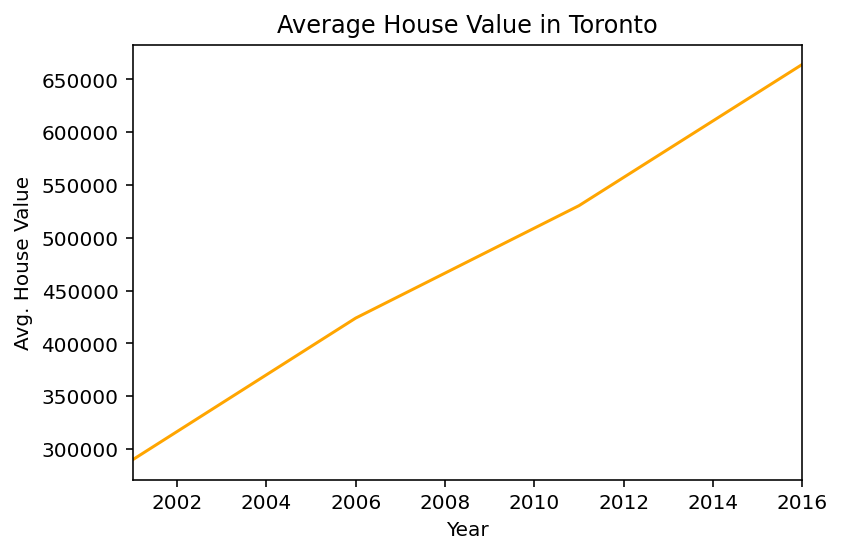
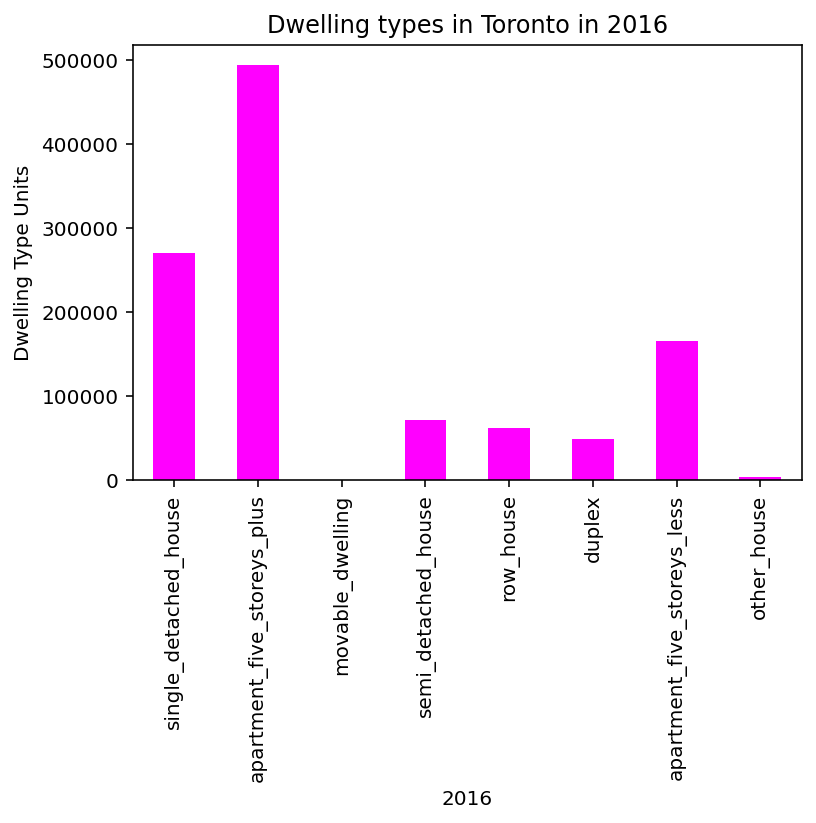
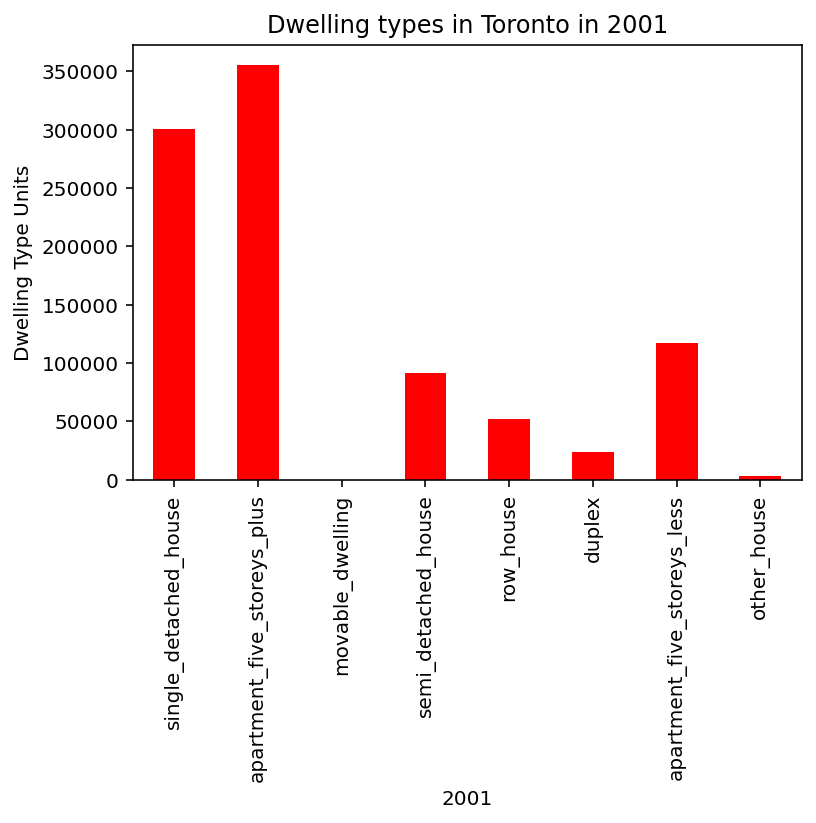
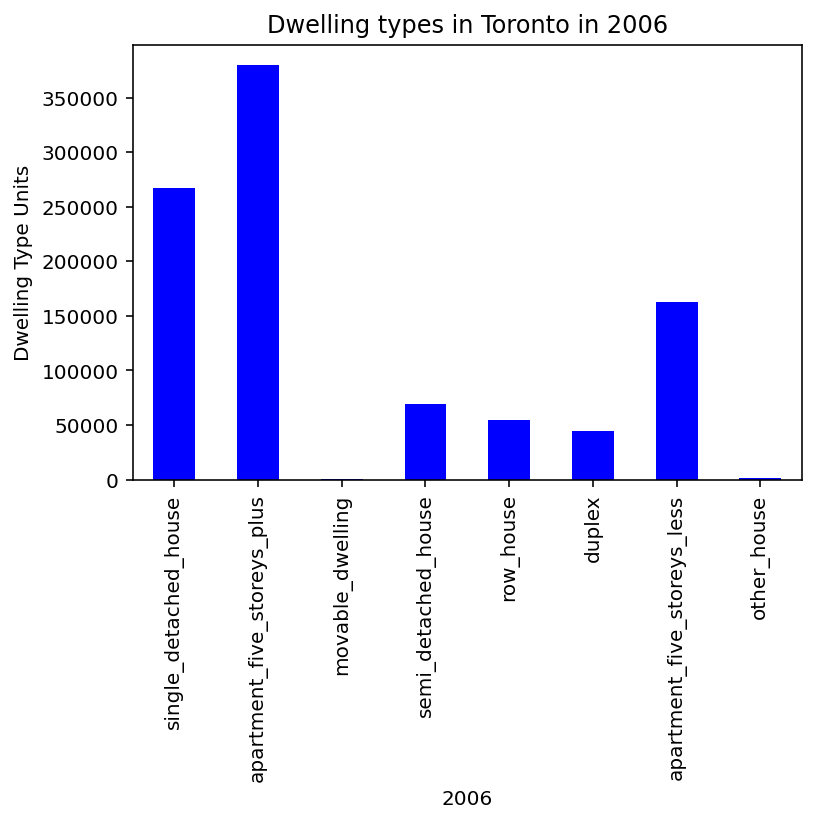
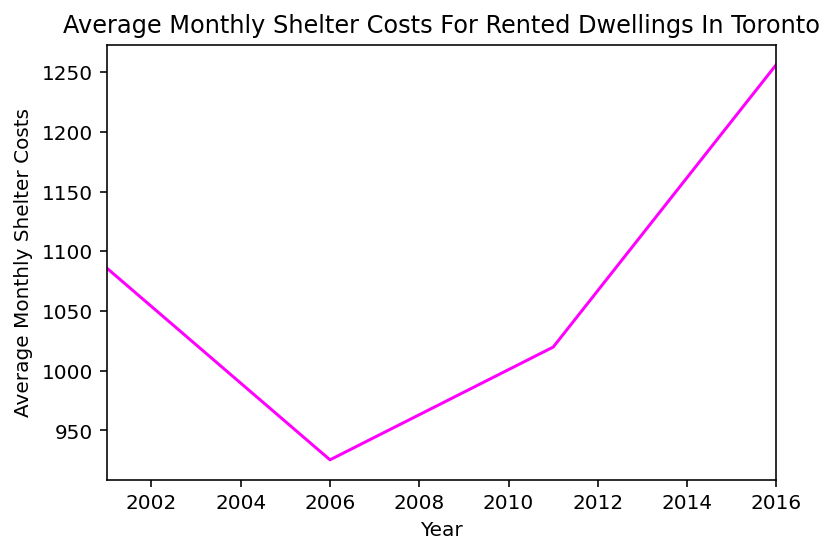
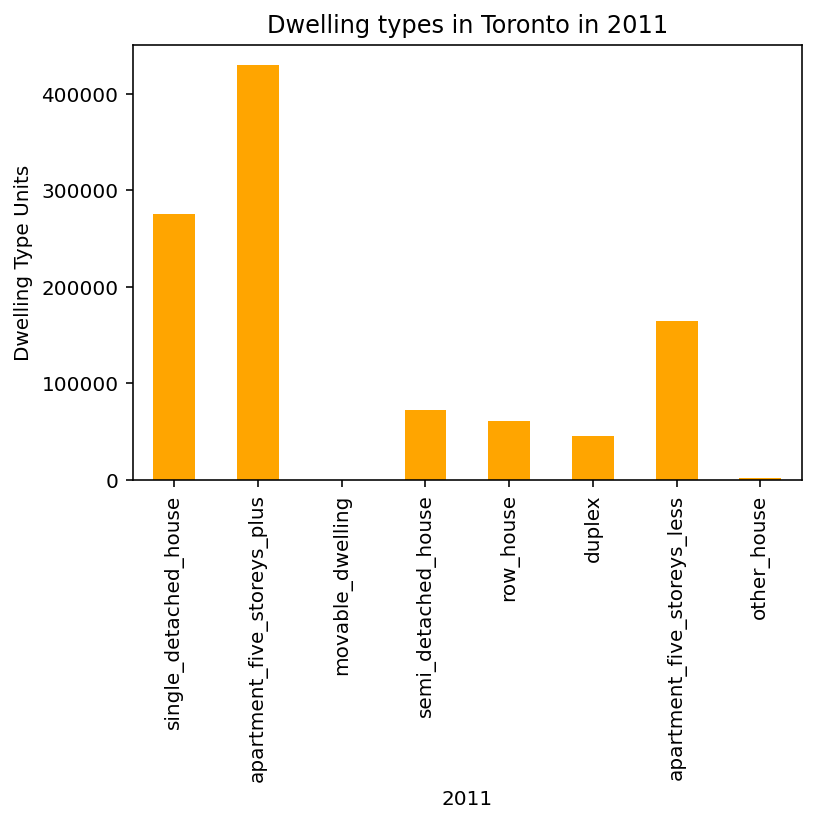
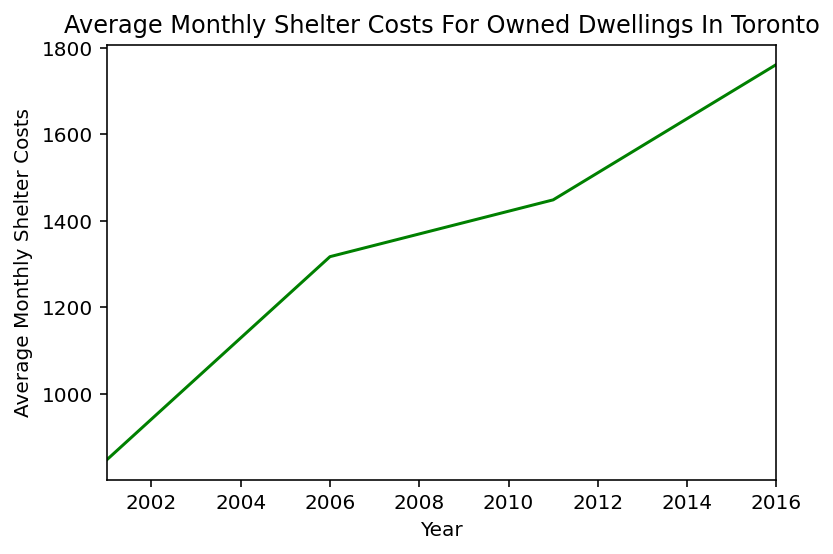

In [26]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

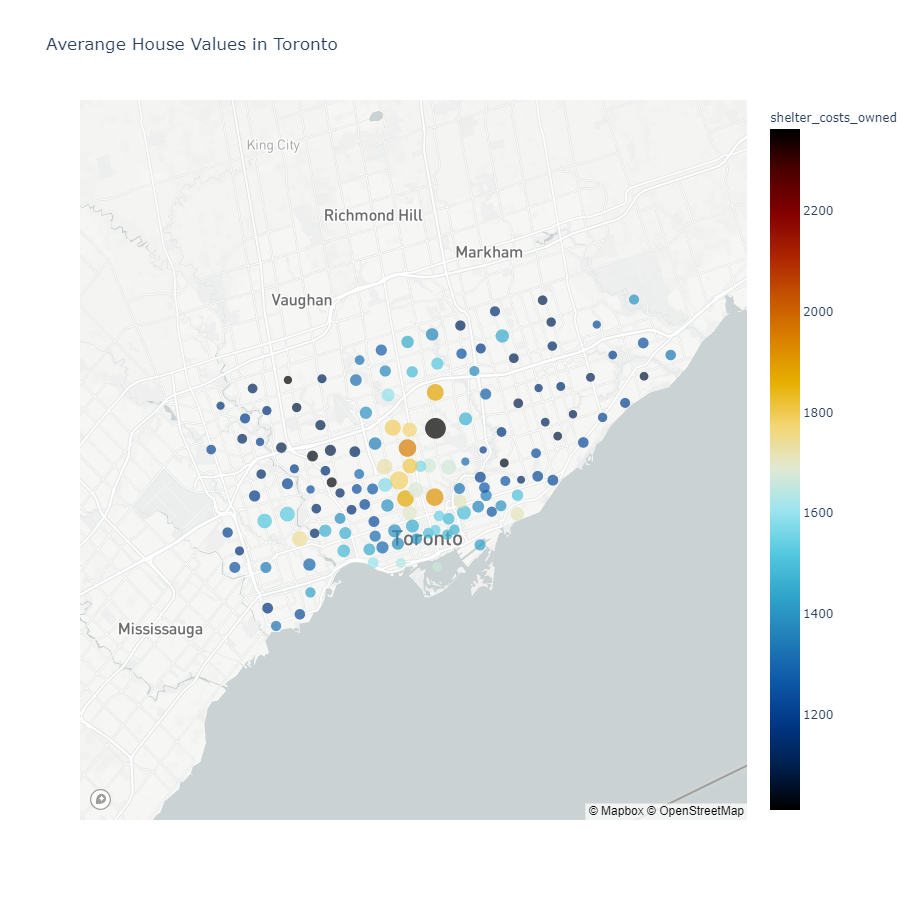

In [61]:
#neighbourhood_map().show()
file_path_1 = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path_1)
each_neighbourhood = to_data.groupby(by='neighbourhood').mean()
each_neighbourhood.reset_index(inplace=True)
each_neighbourhood = pd.merge(df_neighbourhood_locations, each_neighbourhood, on='neighbourhood')    
px.set_mapbox_access_token(map_box_api)
map_scatter = px.scatter_mapbox(each_neighbourhood,
    lat='lat',
    lon='lon',
    size='average_house_value',
    color='shelter_costs_owned',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name='neighbourhood',
    title='Averange House Values in Toronto',
)
map_scatter.show()


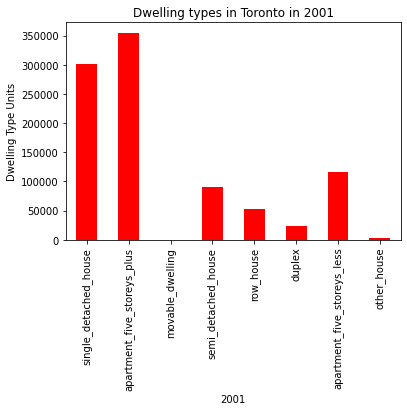

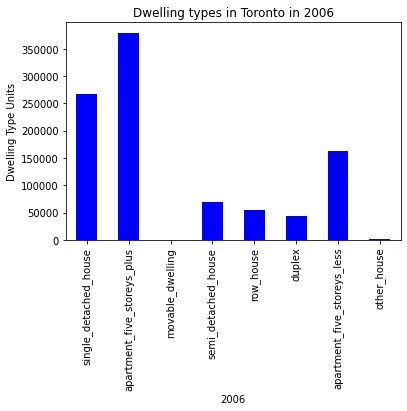

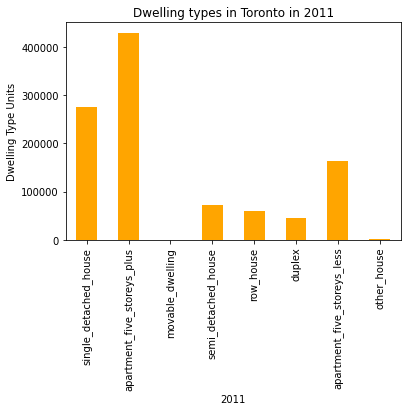

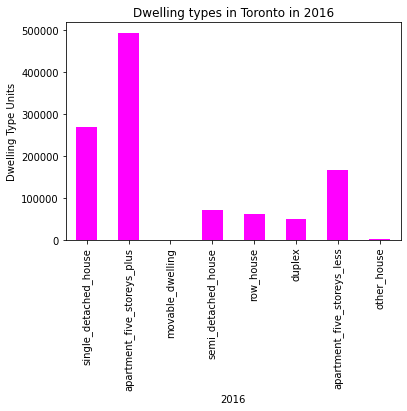

In [53]:
dwelling_types_per_year = to_data.groupby(by='year', level=None).sum()
df=pd.DataFrame(dwelling_types_per_year)
df.to_csv('Data/dwelling_types_per_year.csv', header=False)
columns=['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']
dwelling_types=dwelling_types_per_year[columns]



# create_bar_chart(data, title, xlabel, ylabel, color)
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig=plt.figure()
    bar=data.plot.bar(color=color)
    bar.set_xlabel(xlabel)
    bar.set_ylabel(ylabel)
    bar.set_title(title)
    plt.show()
    plt.close(fig)
    
# # Bar chart for 2001
create_bar_chart(dwelling_types.loc[2001],'Dwelling types in Toronto in 2001','2001','Dwelling Type Units','red')


# # Bar chart for 2006
create_bar_chart(dwelling_types.loc[2006],'Dwelling types in Toronto in 2006','2006','Dwelling Type Units','blue')


# # Bar chart for 2011
create_bar_chart(dwelling_types.loc[2011],'Dwelling types in Toronto in 2011','2011','Dwelling Type Units','orange')


# # Bar chart for 2016
create_bar_chart(dwelling_types.loc[2016],'Dwelling types in Toronto in 2016','2016','Dwelling Type Units','magenta')

<Figure size 432x288 with 0 Axes>

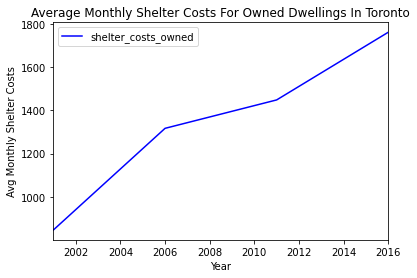

In [27]:
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
avg_monthly_shelter_costs_owned=to_data[['shelter_costs_owned']].groupby(by='year',level=None).mean()

# create_line_chart(data, title, xlabel, ylabel, color)


def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument
    """
    
fig=plt.figure()
line=avg_monthly_shelter_costs_owned.plot.line(color='blue')
line.set_xlabel('Year')
line.set_ylabel('Avg Monthly Shelter Costs')
line.set_title('Average Monthly Shelter Costs For Owned Dwellings In Toronto')
plt.show()  
plt.close(fig)


# # Line chart for owned dwellings
#create_line_chart(avg_monthly_shelter_costs['shelter_costs_owned'],'Average Monthly Shelter Costs For Owned Dwellings In Toronto','Year','Avg Monthly Shelter Costs','blue')




<Figure size 432x288 with 0 Axes>

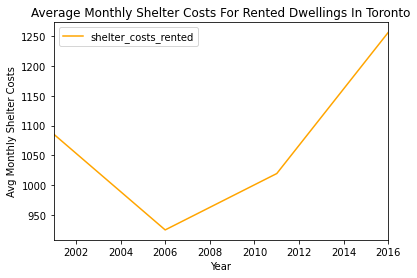

In [26]:
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
avg_monthly_shelter_costs_rented=to_data[['shelter_costs_rented']].groupby(by='year',level=None).mean()

# create_line_chart(data, title, xlabel, ylabel, color)


def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument
    """
    
fig=plt.figure()
line=avg_monthly_shelter_costs_rented.plot.line(color='orange')
line.set_xlabel('Year')
line.set_ylabel('Avg Monthly Shelter Costs')
line.set_title('Average Monthly Shelter Costs For Rented Dwellings In Toronto')
plt.show()  
plt.close(fig)

# # Line chart for Rented dwellings
#create_line_chart(avg_monthly_shelter_costs['shelter_costs_rented'],'Average Monthly Shelter Costs For Rented Dwellings In Toronto','Year','Avg Monthly Shelter Costs','orange')

In [16]:
# average_house_value()
tor_data_new = to_data.groupby([to_data.index, 'neighbourhood']).mean()
tor_sales = tor_data_new['average_house_value']
tor_sales_df = pd.DataFrame(tor_sales).reset_index()

tor_sales_df.hvplot.line(x='year',y='average_house_value',groupby='neighbourhood')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

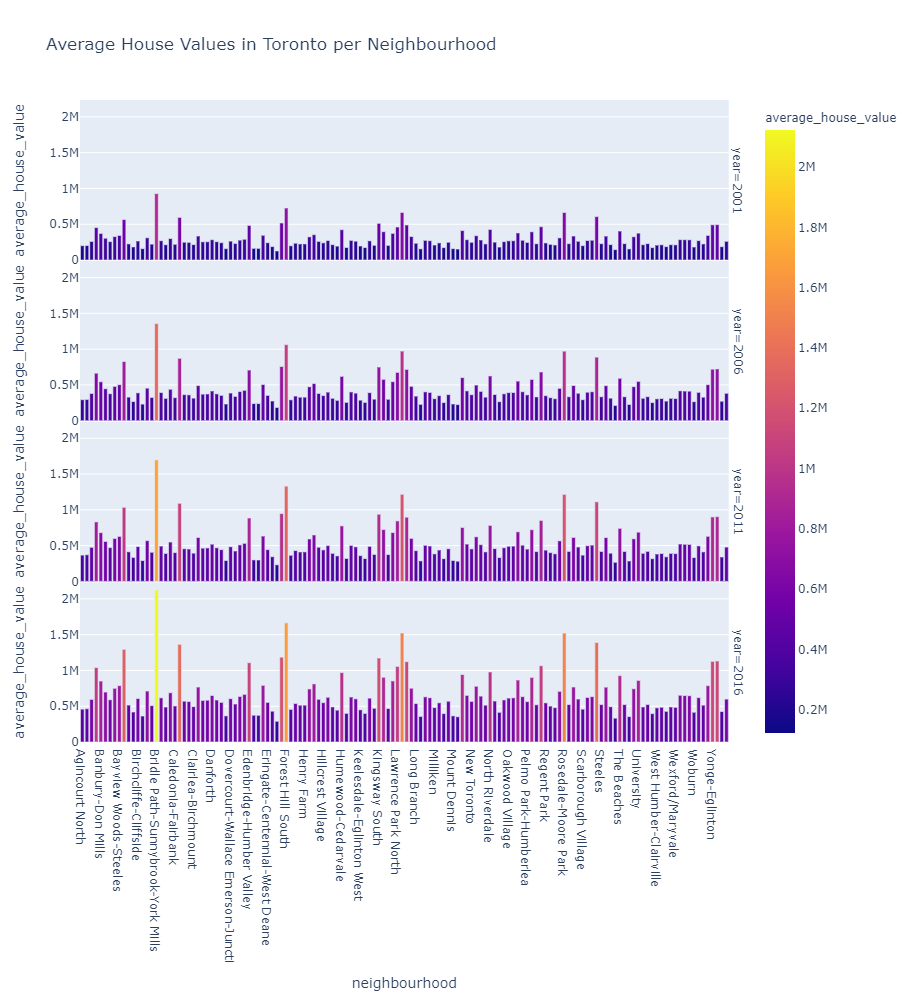

In [15]:
# average_value_by_neighbourhood()
barchart=px.bar(to_data,
        x='neighbourhood',width=900,
        y='average_house_value',height=1000,
        color='average_house_value',
        orientation='v',
        facet_row=to_data.index,
        facet_row_spacing=0.001,
        title='Average House Values in Toronto per Neighbourhood',
               )
figure = barchart
figure.update_xaxes(categoryorder='category ascending')
figure.show()

In [14]:
# number_dwelling_types()
list_dwellings = ['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']
to_data.hvplot.bar('year',
                   list_dwellings,groupby='neighbourhood',
                   rot=90,
                   stacked=False,
                   xlabel='Year',
                   ylabel='Dwelling Type Units',
                   width=700, 
                   height=400)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [67]:
# average_house_value_snapshot()


In [60]:
# top_most_expensive_neighbourhoods()
top10_expen_neighb_plot = top10_expen_neighb.hvplot.bar(x='neighbourhood',
                                y='average_house_value',
                                rot=90,
                                ylim=[0,1800000],
                                width=600,
                                height=500,
                                title='Top 10 Expensive Neighbourhoods')
top10_expen_neighb_plot

:Bars   [neighbourhood]   (average_house_value)

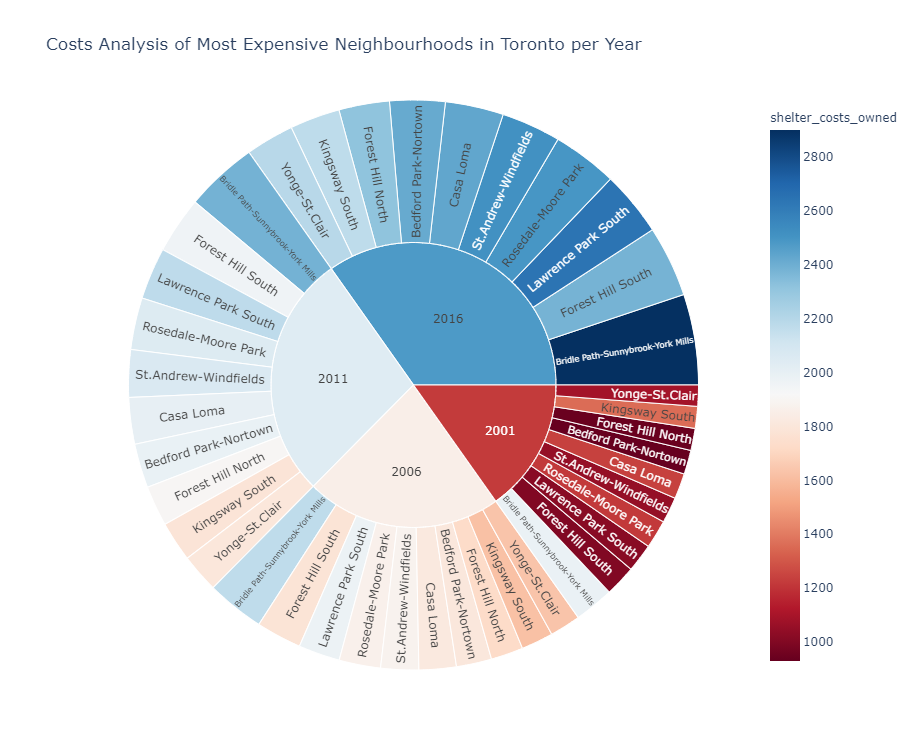

In [68]:
# sunburts_cost_analysis()
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
df_expensive_neighb_year=to_data[to_data['neighbourhood'].isin(top10_expen_neighb['neighbourhood'])]
df_expensive_neighb_year.reset_index (inplace=True)
fig = px.sunburst(df_expensive_neighb_year,
                  path=["year", "neighbourhood"],
                  values='average_house_value',
                  width=750, height=750,
                  color_continuous_scale="RdBu",
                  color='shelter_costs_owned',
                  title="Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year"
                  )
fig.show()